 mesh: nv= 448  nedge= 2674  nfacet= 4344  ne= 2116


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'ngsolve_version': 'Netgen x.x', 'mesh_dim': 3…

enter iccg_solve
Dof= 1370    Nonzeros= 23178
shift parameter= 1.0
minimum residual= 9.903233706903919e-15  at iteraions:  34


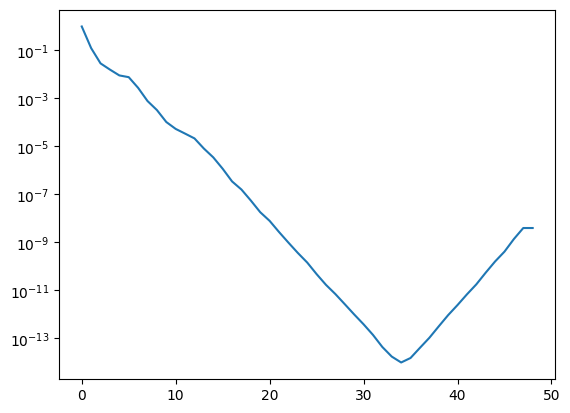

ICCG calculation time (sec): 0.0032727000070735812
enter iccg_solve
Dof= 32344    Nonzeros= 1915642
shift parameter= 1.04
minimum residual= 9.638551722346364e-09  at iteraions:  119


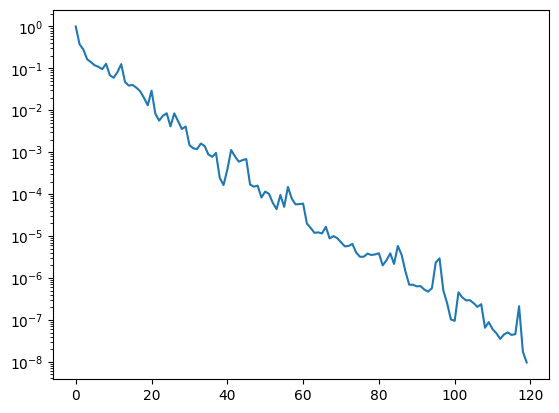

ICCG calculation time (sec): 1.3736002999939956
経過時間: 3.5316 秒  
center magnetic field =  ((0.00041942504354955683-7.154773141395334e-05j), (-0.00044450512597998294-0.00023530552643466024j), (0.0011199970191447751+0.0002957226144100586j))   
 Magnetic energy in conductor= (0.0035647340818679056-0.0010419579416852847j)  Joule loss=  (2.579484266300951+2.4710994455826403j)
**** B field (real)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** B field (imag)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** J field (real)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

**** J field (imag)****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

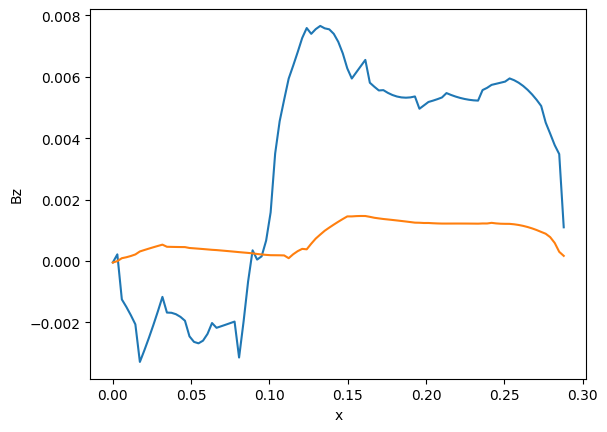

max(eta_t)= 2.6317789418625045e-05   max(eta_j)= 1.226032085868067e-05
 maxerr =  2.6317789418625045e-05 6.270070117845936e-05 0.007042714548878622
ndof= 33362  maxerr =  0.007065914694842001


In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
from A_Phi_ReducedA import A_Phi_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
sys.path.append(r'..\model')
#from SphereMesh import SphereMesh
from BathPlateModel import BathPlateModel
from Team7Model import Team7Model

#coil=UNIF(0,0,1,0)
#model=CubeMesh(msize=meshsize.coarse, curveOrder=3, rKelvin=5)
#model=SphereMesh(mur=1, sigma=5.e7, msize=meshsize.coarse, curveOrder=3, rKelvin=8)
#model=BathPlateModel(holes=2, outerBox="sphere", boxx=0.2, boxy=0.2, boxz=0.2,  msize=meshsize.very_coarse, sigma=0.3278e8, rKelvin=0.)
model=Team7Model(msize=meshsize.very_coarse, rKelvin=300.e-3)
mesh=model.mesh
print(" mesh: nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne) 
Draw(mesh)
DrawGeo(model.geo)

feOrder=3
#cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=True, tol=1.e-8)
cal.CalcResult(model, plotBFieldonLine=True, drawFields=True, pltBField=False)
#maxerror, error=cal.CalcError()
#cal.CalcError()
maxerror, error=cal.CalcError()


In [2]:
"""
iter=0
#for iter in range(6):
while True:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
    rt=cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=True, tol=1.e-8)
    #cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
    #rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0")
    if rt==0: break
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")
"""

'\niter=0\n#for iter in range(6):\nwhile True:\n    iter=iter+1\n    print("Adaptive iteration: ",iter) \n    maxerror, error=cal.CalcError()\n    cal.Refine(maxerror, error)\n    Draw(mesh)\n    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)\n    rt=cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=True, tol=1.e-8)\n    #cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)\n    #rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0")\n    if rt==0: break\n    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")\n'

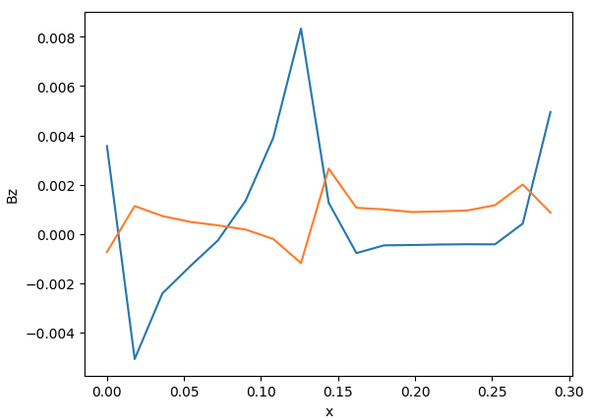
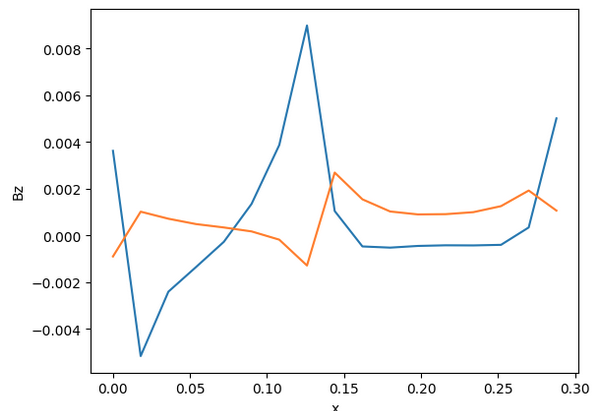